# Multi-Class vs. Multi-Label Classification
---
In machine learning, both multiclass and multilabel classification are techniques used to predict the labels of instances, but they differ in the nature of the outputs they handle.

## Multiclass Classification
---

### Definition: 
- Multiclass classification involves assigning a single label from multiple possible categories (more than two) to each instance. It is an extension of binary classification where instead of two classes, there are multiple classes, but each instance is still classified into exactly one of these classes.

### Examples:
- Predicting the type of animal (e.g., dog, cat, bird) in an image.
- Classifying a news article into categories such as politics, sports, entertainment, etc.

### Methodology: 
- Techniques used for multiclass classification include logistic regression (extended to multinomial logistic regression), decision trees, random forests, support vector machines (with a one-vs-all or one-vs-one strategy), and neural networks designed to output multiple classes.

## Multilabel Classification
---

### Definition: 
- Multilabel classification involves assigning a set of labels (zero, one, or more) to each instance. Here, each instance can be associated with multiple categories simultaneously, reflecting more complex relationships between instances and labels.

### Examples:
- Tagging a blog post with multiple topics such as ["Technology", "Innovation", "Startups"].
- Classifying a movie into multiple genres like ["Action", "Adventure", "Sci-Fi"].

### Methodology: 
- Common approaches to multilabel classification include transformation methods that convert the multilabel problem into multiple independent binary classification problems (one per label), classifier chains that consider label correlations, and adaptations of traditional algorithms to handle label dependencies explicitly.

## Key Differences

- Number of Labels per Instance: In multiclass classification, each instance is associated with exactly one out of several possible classes. In multilabel classification, each instance can be associated with one or more classes out of several possible classes.
- Problem Complexity: Multilabel classification is generally more complex than multiclass because it may require modeling the dependencies between labels, whereas multiclass classification involves selecting the single most appropriate category.
- Evaluation Metrics: The evaluation metrics for multiclass classification (like accuracy, confusion matrix) differ from those used in multilabel settings, which often require metrics that can handle multiple labels simultaneously, such as Hamming loss, precision at k, or subsets accuracy.


# Multi-Class Logistic Regression

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
# Require internet
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# variable information 
print(iris.variables) 

           name     role         type demographic  \
0  sepal length  Feature   Continuous        None   
1   sepal width  Feature   Continuous        None   
2  petal length  Feature   Continuous        None   
3   petal width  Feature   Continuous        None   
4         class   Target  Categorical        None   

                                         description units missing_values  
0                                               None    cm             no  
1                                               None    cm             no  
2                                               None    cm             no  
3                                               None    cm             no  
4  class of iris plant: Iris Setosa, Iris Versico...  None             no  


In [3]:
df = pd.merge(X, y, left_index=True, right_index=True)

In [4]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

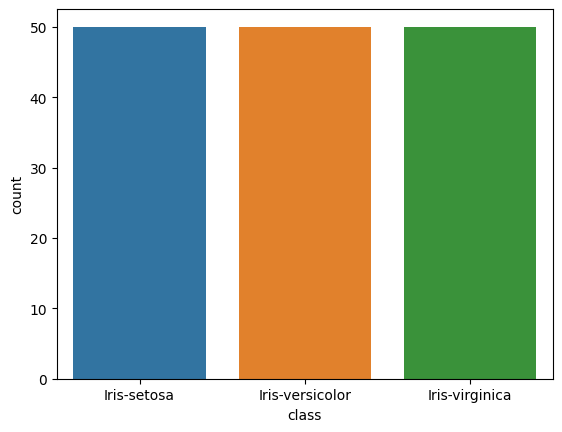

In [11]:
sns.countplot(x='class', data=df)

<Axes: xlabel='sepal length', ylabel='sepal width'>

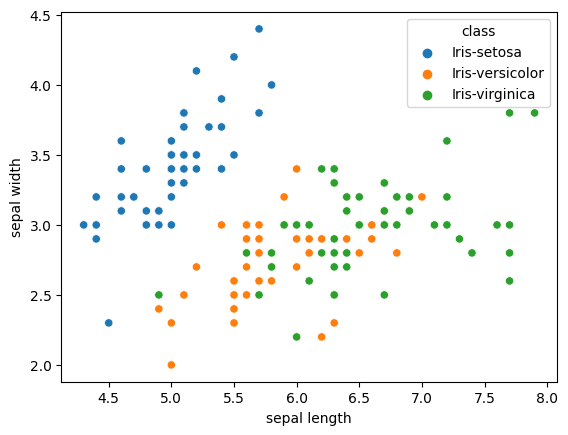

In [13]:
sns.scatterplot(x='sepal length',y='sepal width',data=df,hue='class')

<Axes: xlabel='petal length', ylabel='petal width'>

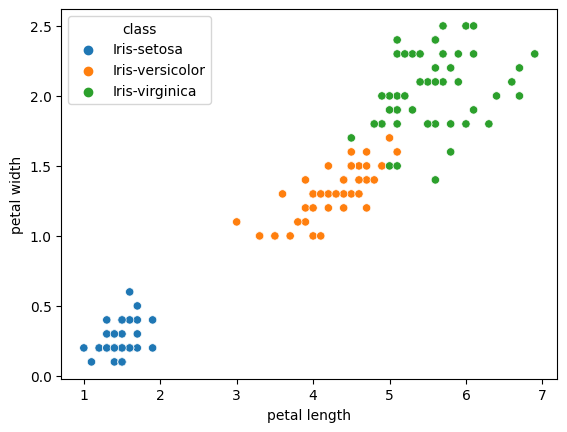

In [15]:
sns.scatterplot(x='petal length',y='petal width',data=df,hue='class')

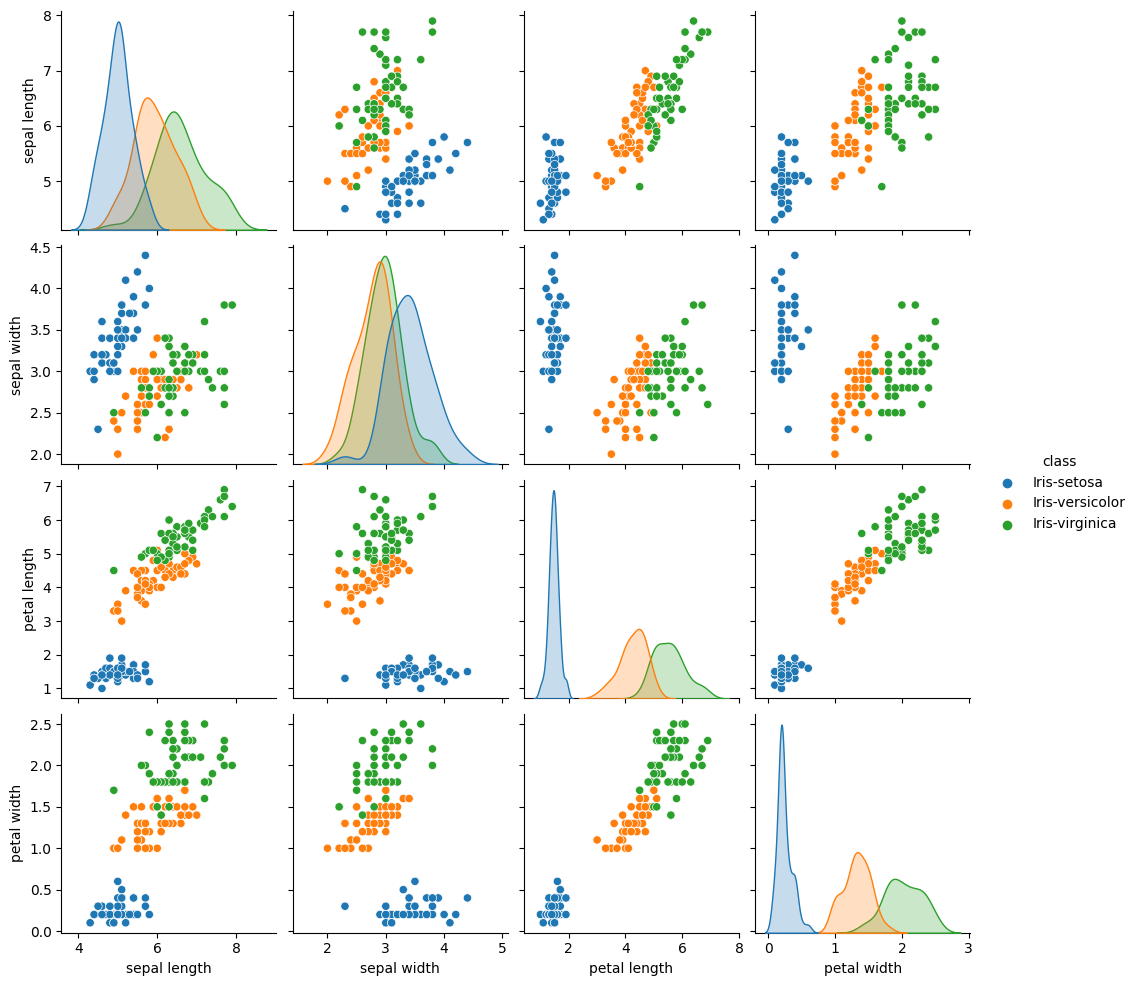

In [16]:
sns.pairplot(df,hue='class')

/var/folders/bw/7qdh0ynx0c9bf8j9_sfpt8fw0000gn/T/ipykernel_41586/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

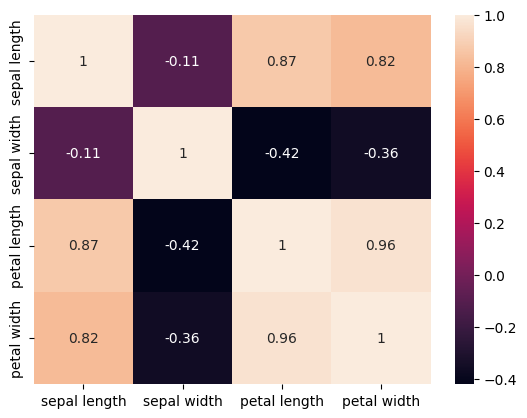

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

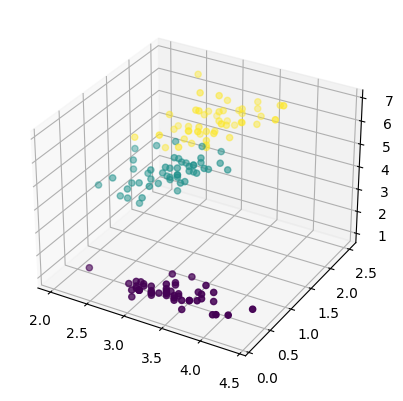

In [20]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = df['class'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
ax.scatter(df['sepal width'],df['petal width'],df['petal length'],c=colors);

### Train | Test Split and Scaling

In [21]:
X = df.drop('class',axis=1)
y = df['class']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [24]:
scaler = StandardScaler()

In [25]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Multi-Class Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
# Depending on warnings you may need to adjust max iterations allowed 
# Or experiment with different solvers
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

### GridSearch for Best Hyper-Parameters

Main parameter choices are regularization penalty choice and regularization C value.

In [29]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [30]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [31]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [32]:
grid_model.best_params_

{'C': 7.742636826811269, 'penalty': 'l1'}

### Model Performance on Classification Tasks

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [34]:
y_pred = grid_model.predict(scaled_X_test)

In [35]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [36]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]])

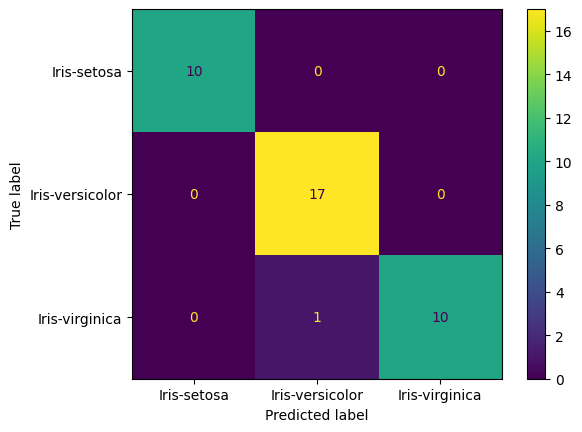

In [37]:
ConfusionMatrixDisplay.from_estimator(grid_model,scaled_X_test,y_test)

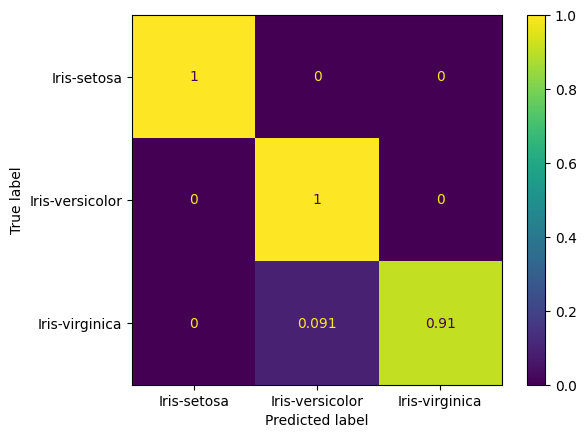

In [38]:
# Scaled so highest value=1
ConfusionMatrixDisplay.from_estimator(grid_model,scaled_X_test,y_test,normalize='true')

In [39]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



## Evaluating Curves and AUC

In [40]:
from sklearn.metrics import roc_curve, auc

In [41]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

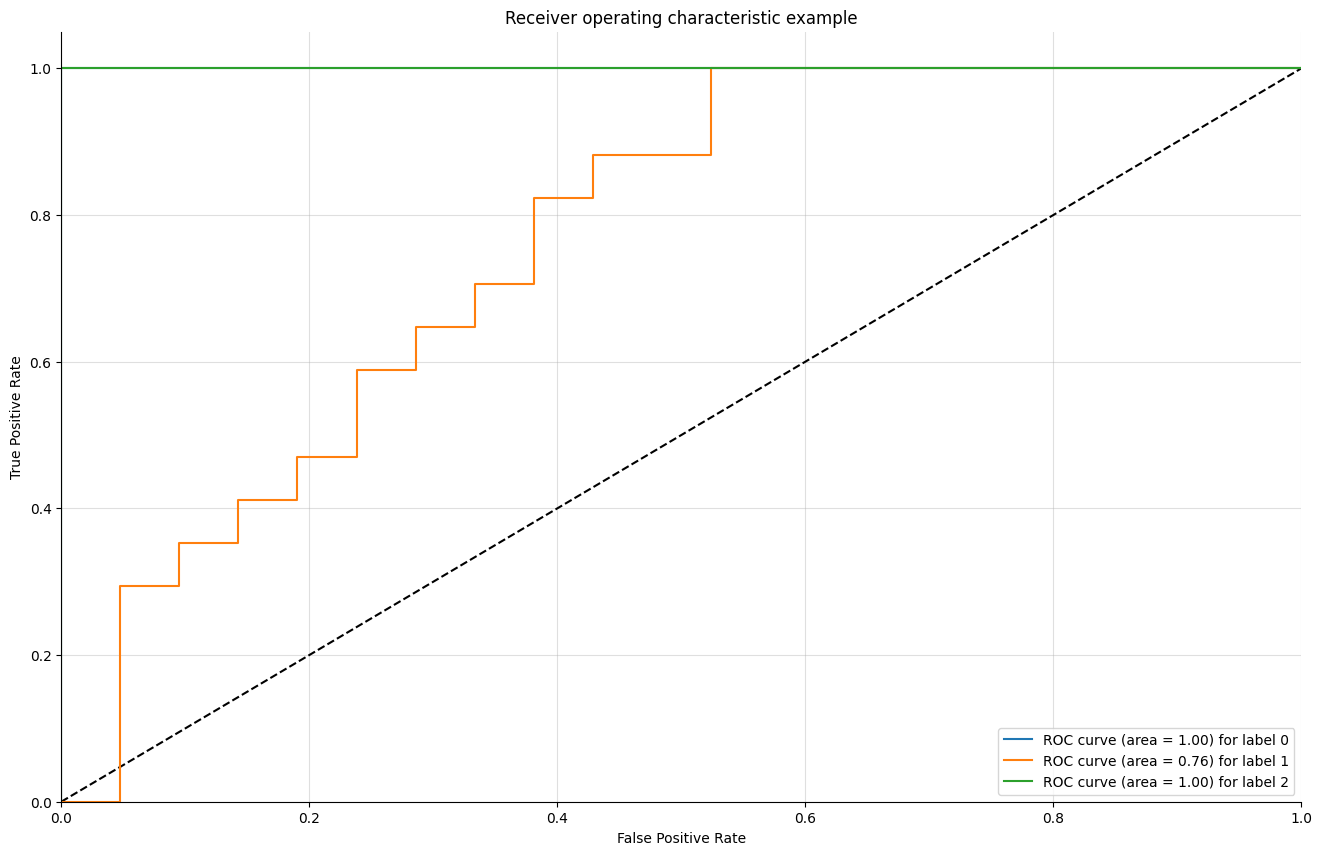

In [42]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(16, 10))

------
------